<a href="https://colab.research.google.com/github/Faareh-Ahmed/Segment-Green-Spaces/blob/main/GreenSpaceSAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change the runtime to GPU

In [1]:
%pip install -U segment-geospatial

In [2]:
import leafmap
from samgeo import SamGeo2

# Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import os

# Path to your folder
folder_path = '/content/drive/My Drive/Sentinel2A'

# List files in the folder to verify access
print(os.listdir(folder_path))

['20181217.tif', '20181227.tif', '20190126.tif', '20190312.tif', '20190322.tif', '20190401.tif', '20190421.tif', '20190426.tif', '20190501.tif', '20190506.tif', '20190526.tif', '20190610.tif', '20190531.tif', '20190630.tif', '20190625.tif', '20190705.tif', '20190918.tif', '20190819.tif', '20190720.tif', '20190908.tif', '20191028.tif', '20191008.tif', '20191013.tif', '20191117.tif', '20191202.tif', '20191207.tif', '20191217.tif', '20191222.tif', '20200116.tif', '20200210.tif', '20200126.tif', '20200215.tif', '20200430.tif', '20200410.tif', '20200225.tif', '20200515.tif', '20200520.tif', '20200525.tif', '20200614.tif', '20200629.tif', '20200912.tif', '20200917.tif', '20200922.tif', '20200927.tif', '20201002.tif', '20201017.tif', '20201027.tif', '20201022.tif', '20201106.tif', '20200714.tif', '20201126.tif', '20201121.tif', '20201201.tif', '20201216.tif', '20210115.tif', '20210120.tif', '20210125.tif', '20210130.tif', '20210214.tif', '20210224.tif', '20210301.tif', '20210326.tif', '202104

In [16]:
# List files in the folder to verify access
# files = os.listdir(folder_path)
# print("Original files:", files)

# Iterate through the files and rename them
for filename in folder_path:
    if filename.endswith('.tif'):
        # Extract the date part from the filename
        date_str = filename[:-4]  # Remove the '.tif' extension
        # Convert to the desired format
        new_date_str = date_str.replace('-', '')  # Remove dashes
        new_filename = f"{new_date_str}.tif"  # Add the .tif extension

        # Create full paths for the old and new filenames
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        # print(f'Renamed: {filename} to {new_filename}')

# List files again to verify the changes
print(os.listdir(folder_path))

Updated files: ['20181217.tif', '20181227.tif', '20190126.tif', '20190312.tif', '20190322.tif', '20190401.tif', '20190421.tif', '20190426.tif', '20190501.tif', '20190506.tif', '20190526.tif', '20190610.tif', '20190531.tif', '20190630.tif', '20190625.tif', '20190705.tif', '20190918.tif', '20190819.tif', '20190720.tif', '20190908.tif', '20191028.tif', '20191008.tif', '20191013.tif', '20191117.tif', '20191202.tif', '20191207.tif', '20191217.tif', '20191222.tif', '20200116.tif', '20200210.tif', '20200126.tif', '20200215.tif', '20200430.tif', '20200410.tif', '20200225.tif', '20200515.tif', '20200520.tif', '20200525.tif', '20200614.tif', '20200629.tif', '20200912.tif', '20200917.tif', '20200922.tif', '20200927.tif', '20201002.tif', '20201017.tif', '20201027.tif', '20201022.tif', '20201106.tif', '20200714.tif', '20201126.tif', '20201121.tif', '20201201.tif', '20201216.tif', '20210115.tif', '20210120.tif', '20210125.tif', '20210130.tif', '20210214.tif', '20210224.tif', '20210301.tif', '2021032

# Initialize Model

In [5]:
predictor = SamGeo2(
    model_id="sam2-hiera-tiny",
    video=True,
)

sam2_hiera_tiny.pt:   0%|          | 0.00/156M [00:00<?, ?B/s]

# Specify the Input Data Path

In [18]:

predictor.set_video(folder_path)

frame loading (JPEG): 100%|██████████| 111/111 [00:04<00:00, 24.04it/s]


interactive(children=(IntSlider(value=0, description='Image', max=110), Output()), _dom_classes=('widget-inter…

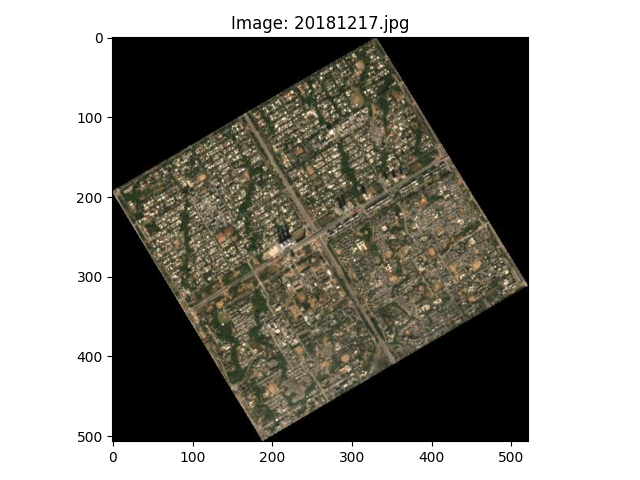

In [21]:
predictor.show_images()

In [26]:
prompts = {
    1: {
        "points": [[158, 397], [325, 180]],
        "labels": [1, 1],
        "frame_idx": 0,
    },
}

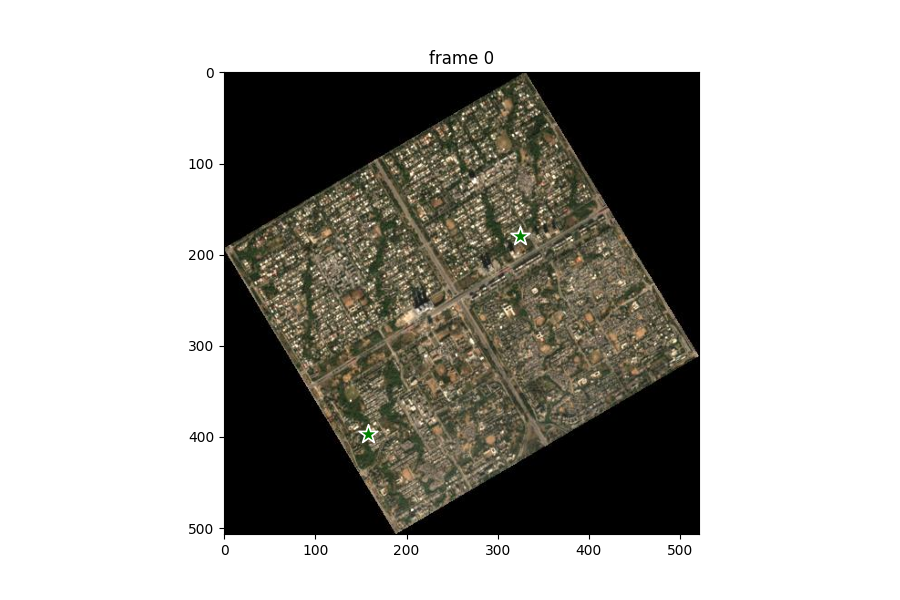

In [27]:
predictor.show_prompts(prompts, frame_idx=0)

# Segment the Objects

In [28]:
predictor.predict_video()

propagate in video: 100%|██████████| 111/111 [00:43<00:00,  2.53it/s]


# Save Results

In [29]:
predictor.save_video_segments("segmentsofSentinel2A")

Rendering frames: 100%|██████████| 111/111 [00:01<00:00, 70.06it/s]


In [30]:
predictor.save_video_segments_blended(
    "TS_blended_Sentinel2A", fps=5, output_video="segments_blended_Sentinel2A.mp4"
)

Rendering frames: 100%|██████████| 111/111 [00:37<00:00,  2.94it/s]


Video saved as segments_blended_Sentinel2A.mp4
